# Beta Bank Churn Rate

__Problema del Negocio__

Beta Bank enfrenta un desafío significativo: cada mes, un número creciente de sus clientes está abandonando el banco. La gestión del banco ha identificado que es más rentable y eficiente enfocar sus esfuerzos en retener a los clientes actuales en lugar de atraer nuevos clientes para reemplazar a los que se van. Esto se debe a los altos costos asociados con la adquisición de nuevos clientes, en comparación con las estrategias de retención que pueden ser más económicas y efectivas.

La pérdida de clientes no solo afecta los ingresos del banco, sino que también puede tener un impacto negativo en la reputación y estabilidad del banco. Por lo tanto, es crucial para Beta Bank desarrollar un sistema que pueda predecir con precisión si un cliente está en riesgo de abandonar el banco. Esta capacidad permitirá a la administración del banco tomar medidas proactivas para retener a esos clientes y reducir la tasa de abandono.

__Metodología__

Para abordar este problema, se utilizarán técnicas de aprendizaje automático para construir un modelo de predicción que determine si un cliente dejará el banco en el futuro cercano. El objetivo principal es crear un modelo con el máximo valor F1 posible, asegurando que el valor F1 para el conjunto de prueba sea de al menos 0.59. Además, se medirá la métrica AUC-ROC y se comparará con el valor F1 para evaluar la capacidad del modelo de distinguir entre las clases positivas y negativas.

__Proceso__

1. __Cargar y Preprocesar los Datos__: Incluirá la limpieza de datos, la imputación de valores faltantes y la normalización de las características numéricas.
<br>

2. __División de los Datos__: Separar los datos en conjuntos de entrenamiento y prueba.
<br>

3. __Manejo del Desequilibrio de Clases__: Aplicar técnicas de submuestreo y sobremuestreo para equilibrar las clases.
<br>

4. __Entrenamiento y Evaluación de Modelos__: Entrenar múltiples modelos de clasificación con diferentes técnicas de manejo de desequilibrio de clases y evaluar su rendimiento.
<br>

5. __Medición de Métricas__: Calcular y comparar el valor `F1` y `AUC-ROC` de los modelos.
<br>

6. __Selección del Mejor Modelo__: Seleccionar el modelo que ofrezca el mejor equilibrio entre las métricas `F1` y `AUC-ROC`.
<br>

__Métricas__

* `F1 Score`: Es una métrica que considera tanto la `precisión` como el `recall` del modelo, proporcionando una medida equilibrada del rendimiento del modelo especialmente útil cuando las clases están desequilibradas.
<br>

* `AUC-ROC`: Esta métrica mide la capacidad del modelo para distinguir entre las clases positivas y negativas. Un alto valor de AUC-ROC indica que el modelo tiene una buena capacidad discriminativa.

## __Descripción de los datos__

__Características__

- `RowNumber`: índice de cadena de datos

- `CustomerId`: identificador de cliente único

- `Surname`: apellido

- `CreditScore`: valor de crédito

- `Geography`: país de residencia

- `Gender`: sexo

- `Age`: edad

- `Tenure`: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)

- `Balance`: saldo de la cuenta

- `NumOfProducts`: número de productos bancarios utilizados por el cliente

- `HasCrCard`: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)

- `IsActiveMember`: actividad del cliente (1 - sí; 0 - no)

- `EstimatedSalary`: salario estimado

__Objetivo__

* `Exited`: El cliente se ha ido (1 - sí; 0 - no)

## Carga de la base de datos

In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

In [2]:
# Cargar los datos
churn_df = pd.read_csv('/datasets/Churn.csv')

# Ver las primeras filas del conjunto de datos
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
# Revisar la composición del DataFrame

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
# Verificar valores faltantes
churn_df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Observamos la existencia de valores faltantes en la columna `Tenure`. Por lo que haremos una imputación simple utilizando la función `SimpleImputer` de la libreria `sklearn` considerando la mediana para reducir el sesgo y asegurar la integridad de los datos.

In [5]:
# Imputar valores faltantes
imputer = SimpleImputer(strategy='median')
churn_df['Tenure'] = imputer.fit_transform(churn_df[['Tenure']])

# Verificar nuevamente si hay valores faltantes
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Preprocesamiento de datos

* __Eliminación de columnas innecesarias__:

`RowNumber`, `CustomerId` y `Surname` no son relevantes para el análisis.

In [6]:
# Eliminar columnas innecesarias
churn_df = churn_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

* __Codificación de variables categóricas__:

`Geography` y `Gender` serán codificadas usando `pd.get_dummies()` para convertirlas en variables binarias.

In [7]:
# Codificar variables categóricas
churn_df = pd.get_dummies(churn_df, columns=['Geography', 'Gender'], drop_first=True)

* __Normalización de características numéricas__:

Normalizaremos `CreditScore`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, y `EstimatedSalary` para mejorar el rendimiento del modelo.

In [8]:
# Normalizar características numéricas

scaler = StandardScaler()
features_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
churn_df[features_to_scale] = scaler.fit_transform(churn_df[features_to_scale])

# Verificar los datos preprocesados
churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.086246,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.448581,0.117350,-0.911583,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,1.087768,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.448581,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.086246,0.785728,-0.911583,1,1,-0.365276,0,0,1,0


## Dividir los datos en conjuntos de entrenamiento y prueba

Dividimos los datos en características (`X`) y el objetivo (`y`), luego los separamos en conjuntos de entrenamiento y validación.

In [9]:
# Dividir los datos en características (X) y objetivo (y)
X = churn_df.drop(columns=['Exited'])
y = churn_df['Exited']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Muestra los tamaños de las tablas almacenadas
print(X_train.shape)
print(X_test.shape)

(7500, 11)
(2500, 11)


## Examinar el equilibrio de clases

Examinamos la distribución de clases en el conjunto de entrenamiento.

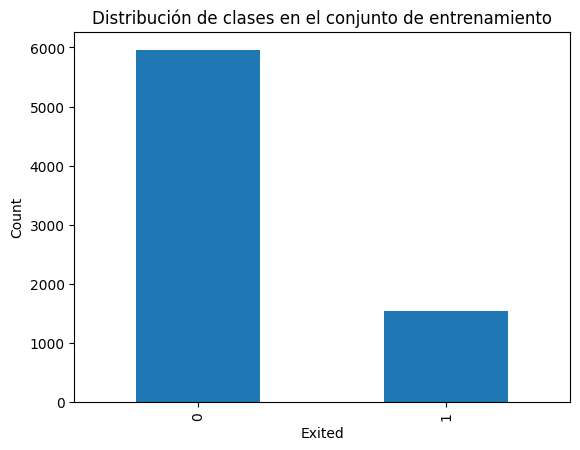

In [10]:
# Examinar el equilibrio de clases
y_train.value_counts().plot(kind='bar', title='Distribución de clases en el conjunto de entrenamiento')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

## Entrenar el modelo sin corregir el desequilibrio de clases

Usamos un modelo de clasificación básico, `Logistic Regression`, para entrenar y evaluar sin manejar el desequilibrio.

In [11]:
# Entrenar el modelo
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'F1 Score:{f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

F1 Score:0.2916
ROC AUC: 0.5789


Estos resultados indican que el modelo necesita mejoras significativas, especialmente para manejar el desequilibrio de clases.

## Manejar el desequilibrio de clases

Probaremos dos enfoques: `submuestreo` de la clase mayoritaria y `sobremuestreo` de la clase minoritaria.

* __Submuestreo de la clase mayoritaria__

In [12]:
from sklearn.utils import resample

# Combinar X_train y y_train para el resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Dividir entre clases mayoritaria y minoritaria
majority_class = train_data[train_data.Exited == 0]
minority_class = train_data[train_data.Exited == 1]

# Submuestreo de la clase mayoritaria
majority_downsampled = resample(majority_class,
                                replace=False,
                                n_samples=len(minority_class),
                                random_state=42)

# Combinar clases submuestreadas y la clase minoritaria
downsampled = pd.concat([majority_downsampled, minority_class])

# Dividir en características y objetivo
X_train_downsampled = downsampled.drop(columns=['Exited'])
y_train_downsampled = downsampled['Exited']

* __Sobremuestreo de la clase minoritaria__

In [13]:
# Sobremuestreo de la clase minoritaria
minority_upsampled = resample(minority_class,
                              replace=True,
                              n_samples=len(majority_class),
                              random_state=42)

# Combinar clases sobremuestreadas y la clase mayoritaria
upsampled = pd.concat([majority_class, minority_upsampled])

# Dividir en características y objetivo
X_train_upsampled = upsampled.drop(columns=['Exited'])
y_train_upsampled = upsampled['Exited']

## Entrenar y evaluar modelos con datos equilibrados

* __Modelo con datos submuestreados__

In [14]:
# Entrenar el modelo con datos submuestreados
model_downsampled = LogisticRegression(random_state=42)
model_downsampled.fit(X_train_downsampled, y_train_downsampled)

# Evaluar el modelo
y_pred_downsampled = model_downsampled.predict(X_test)
f1_downsampled = f1_score(y_test, y_pred_downsampled)
roc_auc_downsampled = roc_auc_score(y_test, y_pred_downsampled)

f1_downsampled, roc_auc_downsampled

(0.4960573476702509, 0.7102952211521752)

* __Modelo con datos sobremuestreados__

In [15]:
# Entrenar el modelo con datos sobremuestreados
model_upsampled = LogisticRegression(random_state=42)
model_upsampled.fit(X_train_upsampled, y_train_upsampled)

# Evaluar el modelo
y_pred_upsampled = model_upsampled.predict(X_test)
f1_upsampled = f1_score(y_test, y_pred_upsampled)
roc_auc_upsampled = roc_auc_score(y_test, y_pred_upsampled)

f1_upsampled, roc_auc_upsampled

(0.49095966620305975, 0.7083509544536314)

Ambos enfoques han mejorado significativamente los puntajes `F1` y `AUC-ROC` en comparación con el modelo inicial sin manejo del desequilibrio de clases.

## Entrenar y evaluar modelos con Random Forest

Vamos a probar con el modelo de `Random Forest` y realizaremos tanto `submuestreo` como `sobremuestreo` para ver cuál da mejores resultados.

In [16]:
# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = rf.predict(X_test)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Mostrar resultados
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC Score: {roc_auc:.2f}')

F1 Score: 0.58
AUC-ROC Score: 0.71


El modelo de `Random Forest` sin ajustes ha logrado un `F1 Score` de `0.58` y un `AUC-ROC Score` de `0.71`. 

* __Submuestreo de la clase mayoritaria__

In [17]:
# Entrenar el modelo con datos submuestreados
rf_downsampled = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_downsampled.fit(X_train_downsampled, y_train_downsampled)

# Evaluar el modelo
rf_y_pred_downsampled = rf_downsampled.predict(X_test)
rf_f1_downsampled = f1_score(y_test, rf_y_pred_downsampled)
rf_roc_auc_downsampled = roc_auc_score(y_test, rf_y_pred_downsampled)

# Mostrar resultados
print(f'F1 con submuestreo: {rf_f1_downsampled:.2f}')
print(f'AUC-ROC con submuestreo: {rf_roc_auc_downsampled:.2f}')

F1 con submuestreo: 0.59
AUC-ROC con submuestreo: 0.78


* __Sobremuestreo de la clase minoritaria__

In [18]:
# Entrenar el modelo con datos sobremuestreados
rf_upsampled = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_upsampled.fit(X_train_upsampled, y_train_upsampled)

# Evaluar el modelo
rf_y_pred_upsampled = rf_upsampled.predict(X_test)
rf_f1_upsampled = f1_score(y_test, rf_y_pred_upsampled)
rf_roc_auc_upsampled = roc_auc_score(y_test, rf_y_pred_upsampled)

# Mostrar resultados
print(f'F1 con sobremuestreo: {rf_f1_upsampled:.2f}')
print(f'AUC-ROC con sobremuestreo: {rf_roc_auc_upsampled:.2f}')

F1 con sobremuestreo: 0.62
AUC-ROC con sobremuestreo: 0.78


* __Mejora del rendimiento con técnicas de balanceo__: Tanto el submuestreo como el sobremuestreo mejoran el rendimiento del modelo en comparación con el modelo sin ajustes. Esto se evidencia en el aumento tanto del `F1 Score` como del `AUC-ROC`.
<br>

* __Sobremuestreo vs. Submuestreo__: El `sobremuestreo` de la clase minoritaria ha mostrado ser ligeramente superior al submuestreo de la clase mayoritaria, logrando un `F1 Score` de `0.62` en comparación con el `0.59` obtenido mediante `submuestreo`. Ambos métodos lograron un `AUC-ROC` similar de `0.78`, lo que indica que ambos métodos son eficaces para mejorar la discriminación del modelo.

En resumen, el uso de `sobremuestreo` de la clase minoritaria se muestra como la mejor técnica en este caso, cumpliendo con el umbral de `F1 Score` requerido `0.59` y mejorando significativamente el rendimiento del modelo en comparación con no aplicar ningún ajuste.

# Conclusión

El objetivo de este proyecto era desarrollar un modelo predictivo que pudiera identificar a los clientes de Beta Bank que están en riesgo de abandonar el banco. La intención era utilizar este modelo para implementar estrategias de retención de clientes, priorizando la retención de clientes actuales sobre la adquisición de nuevos clientes, ya que es una estrategia más rentable.

__Logistic Regression__: Este modelo tiene un rendimiento pobre, con un `F1 Score` de `0.2916` y un `AUC-ROC Score` de `0.5789`, indicando que no es efectivo para predecir la retención de clientes sin manejar el desequilibrio de clases.

* __Submuestreo__: Mejora significativamente las métricas, alcanzando un `F1 Scor`e de `0.4961` y un `AUC-ROC Score` de `0.7103`.

* __Sobremuestreo__: Mejora de manera similar las métricas, con un `F1 Score` de `0.4910` y un `AUC-ROC Score` de `0.7084`.


__Random Forest__: Tiene un rendimiento moderado, pero insuficiente para cumplir con el umbral requerido.

* __Submuestreo__: Mejora ligeramente el `F1 Score` y significativamente el `AUC-ROC Score`.

* __Con Sobremuestreo__: Proporciona los mejores resultados, superando el umbral requerido con un `F1 Score` de `0.62` y un `AUC-ROC Score` de `0.78`.


__Recomendaciones__

1. __Implementación del Modelo con Sobremuestreo__: Dado que el modelo de `Random Forest` con sobremuestreo alcanzó los mejores resultados en términos de `F1 Score` y `AUC-ROC Score`, se recomienda utilizar este modelo para predecir la retención de clientes en Beta Bank. Este modelo proporcionará las predicciones más equilibradas y precisas para identificar a los clientes en riesgo de abandonar el banco.
<br>

2. __Monitoreo Continuo__: Es importante monitorear continuamente el rendimiento del modelo y realizar ajustes según sea necesario. Las características de los clientes y las tendencias del mercado pueden cambiar con el tiempo, lo que podría afectar la precisión del modelo.
<br>

3. __Estrategias de Retención__: Utilizar las predicciones del modelo para diseñar e implementar estrategias de retención personalizadas. Esto puede incluir ofertas especiales, mejoras en el servicio al cliente y programas de fidelización para los clientes identificados como de alto riesgo de abandono.
<br>

4. __Mejora del modelo Random Forest__: Para mejorar aún más el modelo de `Random Forest`, se podría realizar una búsqueda de hiperparámetros utilizando `GridSearchCV`. De tal forma se pueden ajustar parámetros como el número de árboles (`n_estimators`), la profundidad máxima (`max_depth`), el número mínimo de muestras para dividir un nodo (`min_samples_split`), y el número mínimo de muestras en una hoja (`min_samples_leaf`).

En conclusión, la aplicación de técnicas de aprendizaje automático y el manejo adecuado del desequilibrio de clases han demostrado ser efectivos para mejorar la capacidad predictiva del modelo, proporcionando a Beta Bank una herramienta valiosa para retener a sus clientes y reducir la tasa de abandono.